<a href="https://colab.research.google.com/github/vaibhavverma3/All-Projects/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏃 Aerofit Business Case Study 🏃

---

Aerofit has a really interesting backstory! It all began back in 1928 with M/s. Sachdev Sports Co, founded by Ram Ratan Sachdev in Hyderabad, India. Over time, they became a major supplier of sports equipment across Andhra Pradesh and Telangana. As people started wanting more fitness options, M/s. Sachdev Overseas stepped in to bring in top-notch fitness gear under the name "Aerofit," making sure it was affordable and came with great customer support.

# 🎯 Objective

---

AeroFit’s market research team is aiming to understand the specific traits of customers interested in each type of treadmill they offer. This knowledge will help them guide new customers towards the best treadmill choices. The team plans to explore potential differences in customer characteristics across their product range.

We will use descriptive analytics to create unique customer profiles for each AeroFit treadmill model, using tables and charts to illustrate their findings. Specifically, we will construct two-way contingency tables for each treadmill model and calculate conditional and marginal probabilities.

 The insights gained from this analysis will provide valuable information for AeroFit's business strategies.

# 🤔 About data
The company collected the data on individuals who purchased a treadmill from the AeroFit stores.

---

### Products:
- KP281  is an entry-level treadmill that sells for USD 1,500
- KP481  is for mid-level runners that sells for USD 1,750
- KP781  treadmill has advanced features  that sells for USD 2,500

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 12pEfDdUcDbiTcQR198-e2iMde66MKZQN

Downloading...
From: https://drive.google.com/uc?id=12pEfDdUcDbiTcQR198-e2iMde66MKZQN
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 21.5MB/s]


In [3]:
df=pd.read_csv('aerofit_treadmill.csv')
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


#Q1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

- Q1(a) The data type of all columns in the “customers” table.
 *Hint: We want you to display the data type of each column present in the
datbase*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
#changing the type of categorical variables
#from object to category
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


- Q1(b) You can find the number of rows and columns given in the dataset *Hint: We want you to find the shape of the dataset.*

In [6]:
df.shape

(180, 9)

🔎***Insights:*** We have 180 records and 9 columns

In [7]:
#statistics about the numeric columns rounded to 2 decimal places
np.round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.79,6.94,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.57,1.62,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.46,1.08,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.31,0.96,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.58,16506.68,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.19,51.86,21.0,66.00,94.0,114.75,360.0


🔍***Insights***
1. Age - The age range of customers spans from 18 to 50 year , with an average age of 29 years .
2. Education - Customer education levels vary between 12 and 21 years , with an average education duration of 16 years .
3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week , with an average usage frequency of 3 times per week .
4. Fitness - On average, customers have rated their fitness at 3  on a 5-point scale, reflecting a moderate level of fitness .
5. Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000 , with an average income of approximately USD 54,000 .
6. Miles - Customers' weekly running goals range from 21 to 360 miles , with an average target of 103 miles per week .

In [8]:
#statistics about categorical columns
df.describe(include='category').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


- Q1(c) Check for the missing values and find the number of missing values in each
column

In [9]:
df.isnull().sum()#no nulls in data

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

🔎***Insights:*** There are no null values in the dataset

In [10]:
#checking duplicate entries
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [11]:
print('Ranges of Continuous Variables')
print(f"Age : {df.Age.min()}yrs - {df.Age.max()}yrs")
print(f"Education : {df.Education.min()} - {df.Education.max()} yrs")
print(f"Usage : {df.Usage.min()} - {df.Usage.max()} days per week")
print(f"Fitness : {df.Fitness.min()} - {df.Fitness.max()} in a scale")
print(f"Income : {round(df.Income.min()//1000)}k - {round(df.Income.max()//1000)}k in $")
print(f"Miles : {df.Miles.min()} - {df.Miles.max()} miles per week")

Ranges of Continuous Variables
Age : 18yrs - 50yrs
Education : 12 - 21 yrs
Usage : 2 - 7 days per week
Fitness : 1 - 5 in a scale
Income : 29k - 104k in $
Miles : 21 - 360 miles per week


🔎***Insights:*** There are no duplicate values in the dataset

#Q2. Detect Outliers

- Q2a Find the outliers for every continuous variable in the dataset. *Hint: We want you to use boxplots to find the outliers in the given dataset*

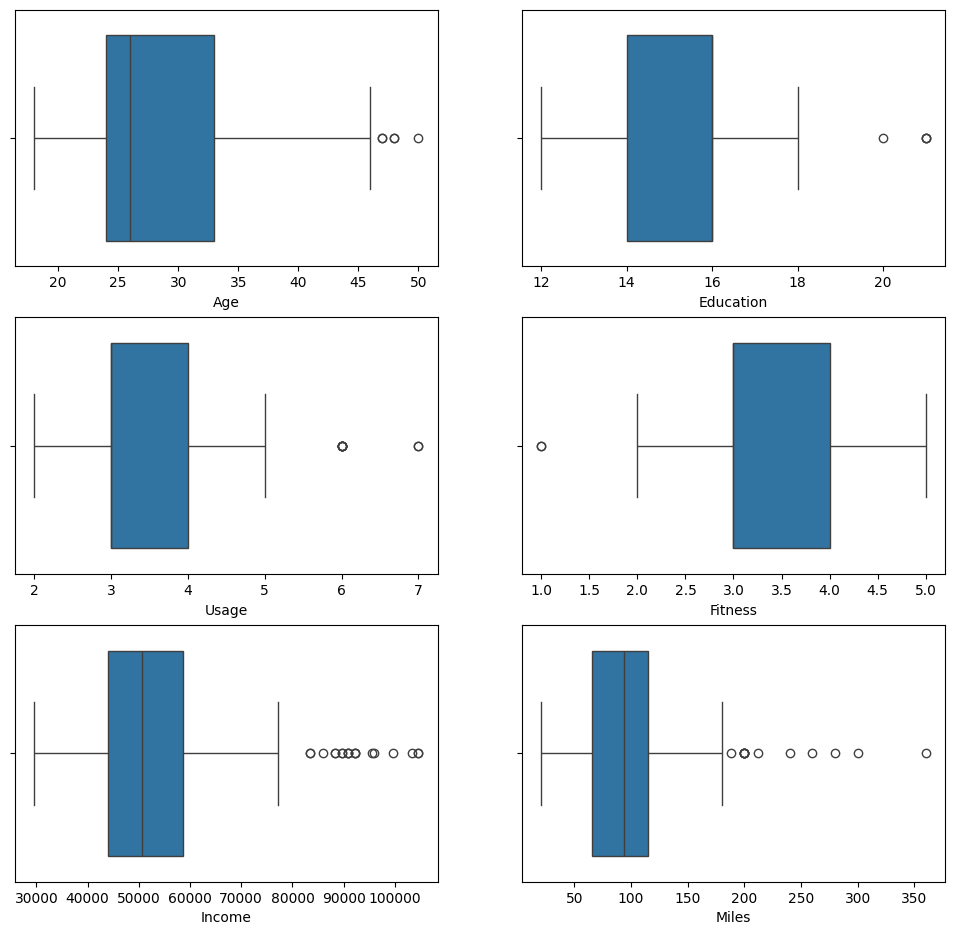

In [12]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2) #adjusts the spacing around subplots in a matplotlib figure.
sns.boxplot(data=df, x="Age", ax=axis[0,0])
sns.boxplot(data=df, x="Education", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", ax=axis[1,1])
sns.boxplot(data=df, x="Income", ax=axis[2,0])
sns.boxplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

In [13]:
#counting outliers
continuous_vars = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']
for var in continuous_vars:
  q1=np.percentile(df[var],25)
  q3=np.percentile(df[var],75)
  iqr=q3-q1
  upper=q3 + 1.5*iqr
  lower=q1 - 1.5*iqr
  df_outliers=df.loc[(df[var]>upper) | (df[var]< lower) ]
  print(f"The outliers in {var} are {df_outliers[var].count()}")

The outliers in Age are 5
The outliers in Education are 4
The outliers in Usage are 9
The outliers in Fitness are 2
The outliers in Income are 19
The outliers in Miles are 13


In [14]:
print(f"The median age is {df['Age'].median()}")
print(f"The median years if education is {df['Education'].median()}")
print(f"The median usage per week is {df['Usage'].median()}")
print(f"The median fitness rating is {df['Fitness'].median()}")
print(f"The median income is {df['Income'].median()}")
print(f"The median miles run per week is {df['Miles'].median()}")

The median age is 26.0
The median years if education is 16.0
The median usage per week is 3.0
The median fitness rating is 3.0
The median income is 50596.5
The median miles run per week is 94.0


🔎***Insights:***
* There are 5 outliers in the Age variable. The median age of the given customers is 26 years
* There are 4 outliers in the Education variable. The median years of education of the given customers is 16 years
* There are 9 outliers in the Usage variable. The median usage per week of the given customers is 3 times per week
* There is 2 outlier in the Fitness variable. The median fitness rating of the given customers is 3
* There are 19 outliers in the Income variable. The median income of the given customers is 50596.5 USD
* There are 13 outliers in the Miles variable. The median miles per week for given customers is 94 miles

- Q2b Remove/clip the data between the 5 percentile and 95 percentile. *Hint: We want You to use np.clip() for clipping the data*

In [15]:
# List of continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Detect outliers and remove/clipped data
for var in continuous_vars:
    #calculate the 5th and 95th percentiles
    p5 = np.percentile(df[var],5)
    p95 = np.percentile(df[var],95)

    # Clip data between 5th and 95th percentiles
    df[var] = np.clip(df[var], p5, p95)

In [16]:
#checking if outliers are present
#identify outliers based on 1.5*IQR rule
#list of continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Detect outliers and remove/clipped data
for var in continuous_vars:
  iqr = np.percentile(df[var],75) - np.percentile(df[var],25)
  lower_bound = np.percentile(df[var],25) - 1.5 * iqr
  upper_bound = np.percentile(df[var],75) + 1.5 * iqr

#print outliers
  outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
  print(f'Outliers for {var}:')
  print(outliers)


Outliers for Age:
Series([], Name: Age, dtype: float64)
Outliers for Education:
Series([], Name: Education, dtype: int64)
Outliers for Usage:
Series([], Name: Usage, dtype: float64)
Outliers for Income:
159    83416.00
160    88396.00
161    90886.00
162    90948.25
164    88396.00
166    85906.00
167    90886.00
168    90948.25
169    90948.25
170    89641.00
171    90948.25
172    90948.25
173    90948.25
174    90948.25
175    83416.00
176    89641.00
177    90886.00
178    90948.25
179    90948.25
Name: Income, dtype: float64
Outliers for Fitness:
Series([], Name: Fitness, dtype: int64)
Outliers for Miles:
23     188
84     200
142    200
148    200
152    200
155    200
166    200
167    200
170    200
171    200
173    200
175    200
176    200
Name: Miles, dtype: int64


In [17]:
#calculating range of variables after clipping the data
print('Ranges of Continuous Variables')
print(f"Age : {df.Age.min()}yrs - {df.Age.max()}yrs")
print(f"Education : {df.Education.min()} - {df.Education.max()} yrs")
print(f"Usage : {df.Usage.min()} - {df.Usage.max()} days per week")
print(f"Fitness : {df.Fitness.min()} - {df.Fitness.max()} in a scale")
print(f"Income : {round(df.Income.min()//1000)}k - {round(df.Income.max()//1000)}k in $")
print(f"Miles : {df.Miles.min()} - {df.Miles.max()} miles per week")
#these ranges will be used to categorise numerical variables

Ranges of Continuous Variables
Age : 20.0yrs - 43.04999999999998yrs
Education : 14 - 18 yrs
Usage : 2.0 - 5.049999999999983 days per week
Fitness : 2 - 5 in a scale
Income : 34k - 90k in $
Miles : 47 - 200 miles per week


**Categorising numerical variables**

In [18]:
#categorising age
df['Age_group'] = pd.cut(df['Age'], bins=[20, 28, 36, 44],labels=['Adult','Middle Aged','Elderly'], right=False)
df.Age_group.value_counts()

Age_group
Adult          98
Middle Aged    54
Elderly        28
Name: count, dtype: int64

In [19]:
#categorising fitness
df['Fitness_comment'] = df.Fitness
df['Fitness_comment'] = df.Fitness_comment.replace({ 1:"Poor Shape", 2:"Bad Shape", 3:"Average Shape", 4:"Good Shape", 5:"Excellent Shape"})
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_comment
175,KP781,40.00,Male,18,Single,5.05,5,83416.00,200,Elderly,Excellent Shape
176,KP781,42.00,Male,18,Single,5.00,4,89641.00,200,Elderly,Good Shape
177,KP781,43.05,Male,16,Single,5.00,5,90886.00,160,Elderly,Excellent Shape
178,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,120,Elderly,Excellent Shape
179,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,180,Elderly,Excellent Shape


In [20]:
#categorising income
income_bins=[34000,50000,65000,80000,95000]
df['Income_Group']=pd.cut(df['Income'], bins=income_bins, labels=['lower middle', 'middle class', 'upper middle','high class'], right=False)
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_comment,Income_Group
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,Adult,Good Shape,lower middle
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,Adult,Average Shape,lower middle


In [21]:
#categorising miles
df['Miles_group']=pd.cut(df['Miles'], bins=[40,80,120,160,200],labels=['40-80','80-120', '120-160', '160-200'],right=True)
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_comment,Income_Group,Miles_group
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,Adult,Good Shape,lower middle,80-120
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,Adult,Average Shape,lower middle,40-80
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66,Adult,Average Shape,lower middle,40-80


In [22]:
np.round(df['Usage']).unique()
#after clippig the data there are only 4 unique values of usage per week
#hence we do not categorise this

array([3., 2., 4., 5.])

In [23]:
df['Education'].unique()
#there are only 4 unique values in education so we dont categorise education also

array([14, 15, 16, 18])

In [24]:
df.head()
#added the categories based on the numerical variables

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Fitness_comment,Income_Group,Miles_group
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,Adult,Good Shape,lower middle,80-120
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,Adult,Average Shape,lower middle,40-80
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66,Adult,Average Shape,lower middle,40-80
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85,Adult,Average Shape,lower middle,80-120
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47,Adult,Bad Shape,lower middle,40-80


🔎***Insights:*** Values adjusted when compared to range found previously, before using np.clip

#3. Check if features like marital status, Gender, and age have any effect on the product purchased

- Find if there is any relationship between the categorical variables and the output variable in the data. *Hint: We want you to use the count plot to find the relationship between categorical variables and output variables.*


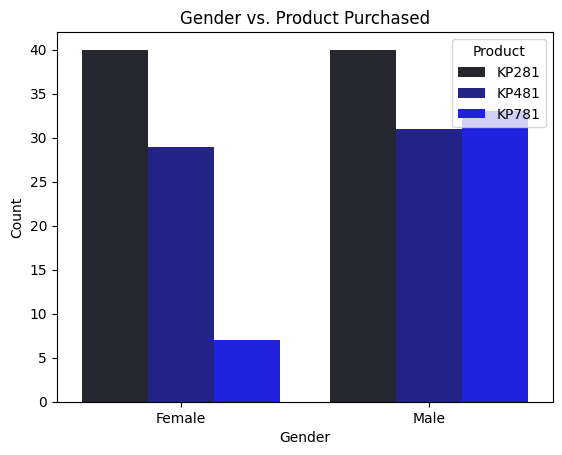

In [25]:
sns.countplot(x='Gender', hue='Product', data=df, palette='dark:Blue')
plt.title('Gender vs. Product Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

🔎***Insights:*** KP281 being the entry level treadmill, has more buyers in both males and females.

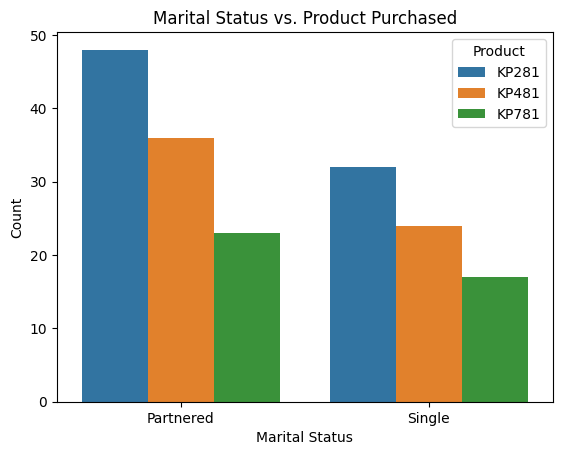

In [26]:
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Marital Status vs. Product Purchased')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

🔎***Insights:*** We have 180 records and 9 columns

- Find if there is any relationship between the continuous variables and the output variable in the data. *Hint: We want you to use a scatter plot to find the relationship between continuous variables and output variables.*

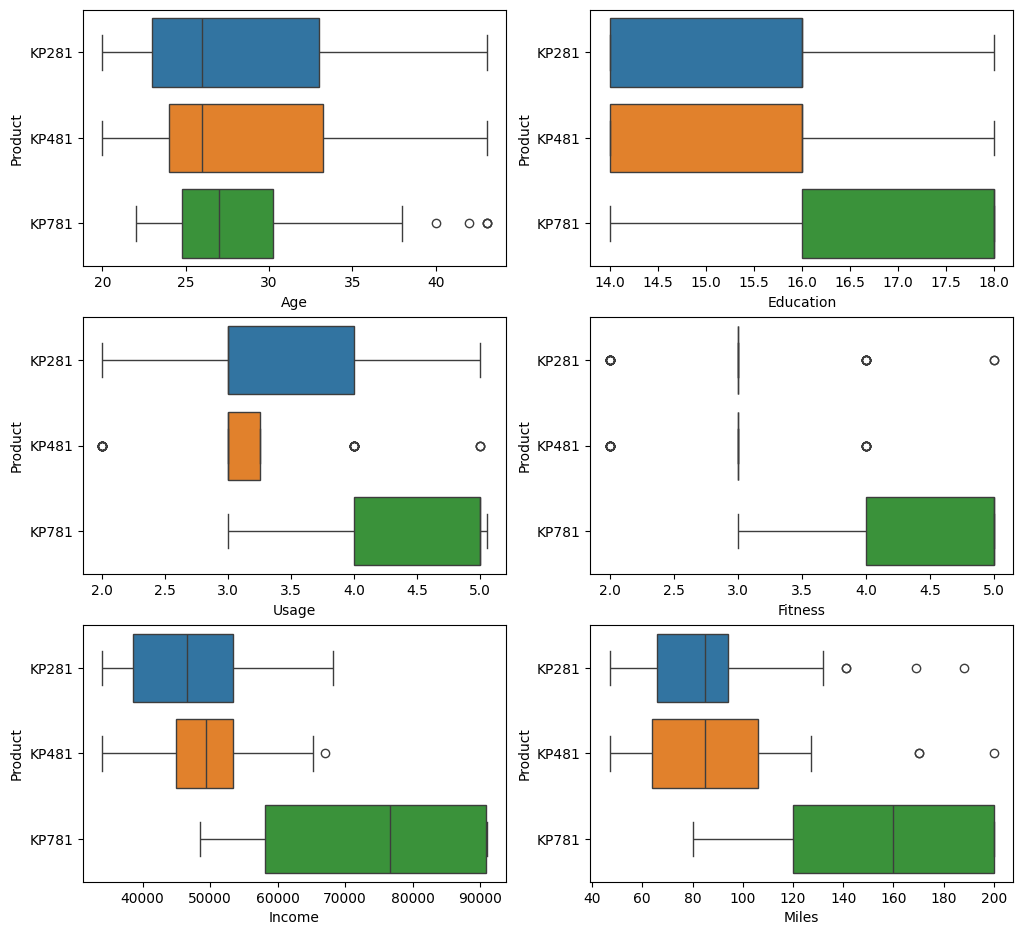

In [27]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2) #adjusts the spacing around subplots in a matplotlib figure.
sns.boxplot(data=df, x="Age", y='Product', hue='Product', ax=axis[0,0])
sns.boxplot(data=df, x="Education", y='Product', hue='Product', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", y='Product', hue='Product', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", y='Product', hue='Product', ax=axis[1,1])
sns.boxplot(data=df, x="Income", y='Product', hue='Product', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", y='Product', hue='Product', ax=axis[2,1])
plt.show()

🔎***Insights:*** From the above plots we can say that
* Customers who buy treadmill are aged between 20 years and 46 years, KP781 is mostly bought by customers between 24-31 years of age(adult and middle aged)
* Customers who have 14-16 years of education prefer the KP281, KP481 treadmills, which are cheaper. While customers who have 16-18 years of education prefer KP781. From this it can also be concluded the more education means more income
* Customers who use treadmills 3-4 times a week prefer cheaper treadmills (KP281, KP481), whereas customers who use treadmills 4-5 times a week prefer KP781 which the most expensive treadmill
* Customers who have fitness rating between 4-5(good to excellent body shape) prefer the high end KP781 treadmill
* Customers whose income is between 40,000 USD to 54,000 USD prefer KP281 and KP481. However KP781 is preferred by customers with incomes in the range 58,000 USD to 93,000 USD.
* Customers who run between 64 to 96 miles per week prefer KP281(entry level treadmill), those who run between 62 to 104 miles per week prefer KP481(mid level treadmill), while those who run between 120 to 200 miles per week choose KP781(high end treadmill)

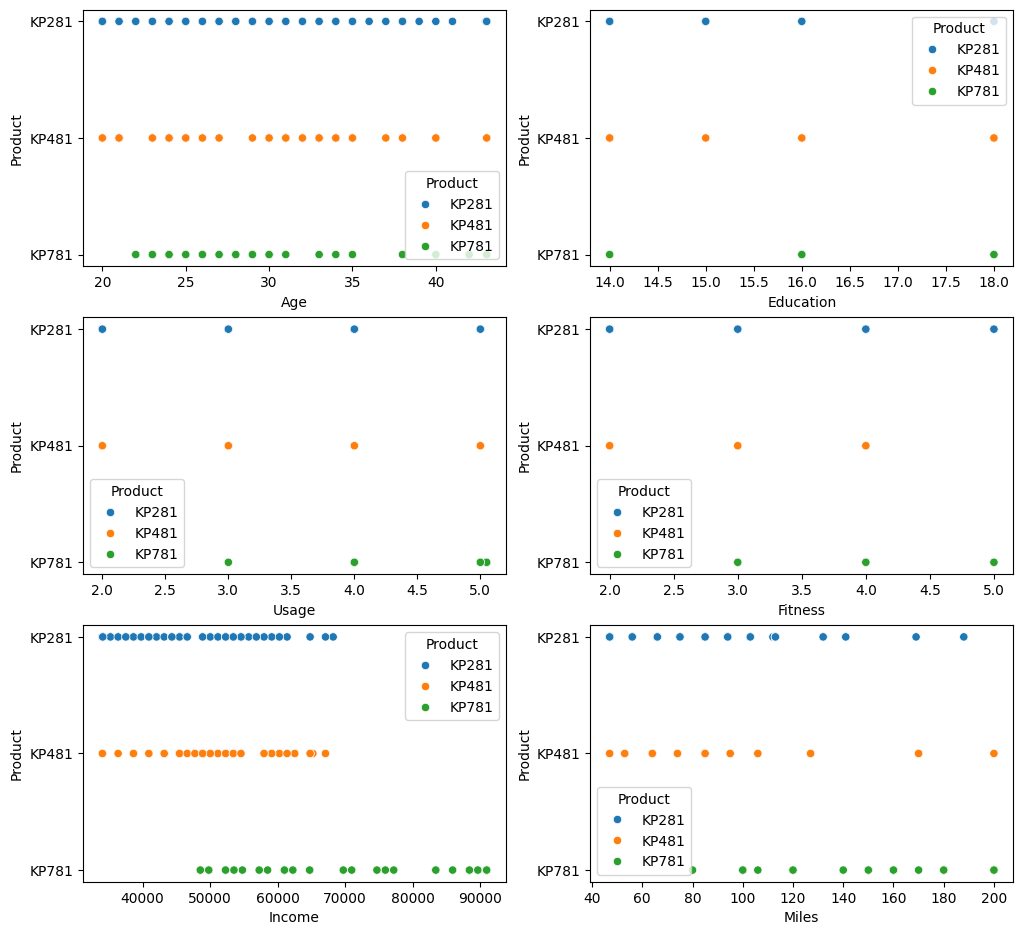

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2) #adjusts the spacing around subplots in a matplotlib figure.
sns.scatterplot(data=df, x="Age", y='Product', hue='Product', ax=axis[0,0])
sns.scatterplot(data=df, x="Education", y='Product', hue='Product', ax=axis[0,1])
sns.scatterplot(data=df, x="Usage", y='Product', hue='Product', ax=axis[1,0])
sns.scatterplot(data=df, x="Fitness", y='Product', hue='Product', ax=axis[1,1])
sns.scatterplot(data=df, x="Income", y='Product', hue='Product', ax=axis[2,0])
sns.scatterplot(data=df, x="Miles", y='Product', hue='Product', ax=axis[2,1])
plt.show()

#

#Q4. Representing the Probability

- Q4(a) Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781) *Hint: We want you to use the pandas crosstab to find the marginal probability of each product.*


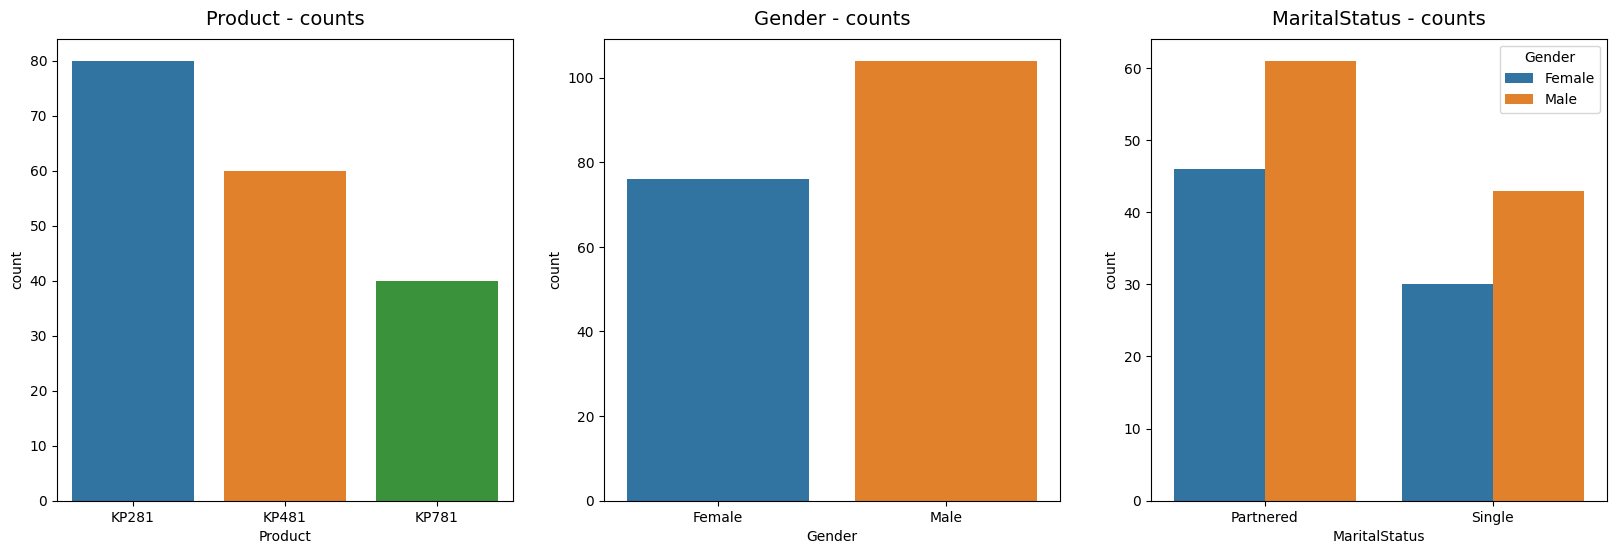

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', hue='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', hue='Gender',  ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', hue='Gender', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [30]:
contingency_table=pd.crosstab(index=df['Product'], columns='count')
contingency_table

col_0,count
Product,
KP281,80
KP481,60
KP781,40


🔎***Insights:***

KP281 was bought by 80 customers

KP481 was bought by 60 customers

KP781 was bought by 40 customers

In [31]:
marginal_probabilities = np.round(contingency_table *100 / len(df),2)
marginal_probabilities

col_0,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


🔎***Insights:***

Probability of KP281 was bought is 44.44% being the entry level treadmill and cheapest among all

Probability of KP481 was bought is 33.33%

Probability of KP781 was bought is 22.22% being the most expensive treadmill

- Q4(b) Find the probability that the customer buys a product based on each column. *Hint: Based on previous crosstab values you find the probability.*

- Q4(c) Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481) *Hint: Based on previous crosstab values you find the probability.*

**Probability of Gender using pd.crosstab**

In [32]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


🔎***Insights:*** The dataset has 76 females and 104 males

In [33]:
round(pd.crosstab(df['Product'], df['Gender'], margins=True, normalize=True)*100,2)
#normalize=True parameter normalizes the contingency table values.
#When normalize=True, the values in the table are divided by the sum of all values
#effectively converting the counts to proportions or percentages

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


🔎***Insights:*** Probability of Gender
* Probability of product being bought by female is 42.22%
* Probability of product being bought by male is 57.78%

In [34]:
#conditional probabilty - Gender given
round(pd.crosstab(df['Product'], df['Gender'], margins=True, normalize='columns')*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


🔎***Insights:*** Conditional Probability of Product given Gender [P(Product | Gender)]
* P(KP281 | Female) = 52.63 %
* P(KP481 | Female) = 38.16 %
* P(KP781 | Female) = 9.21 %
* P(KP281 | Male) = 38.46 %
* P(KP481 | Male) = 29.81 %
* P(KP781 | Male) = 31.73 %

**Probability of Marital Status using pd.crosstab**

In [35]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


🔎***Insights:*** The dataset has 107 partnered and 73 single customers

In [36]:
round(pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize=True)*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


🔎***Insights:*** Probability of Marital Status
* Probability of product being bought by Partnered	is 59.44%
* Probability of product being bought by Single is 40.56%

In [37]:
#conditional probability - marital status given
round(pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize='columns')*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22



🔎***Insights:*** Conditional Probability of Product given Gender [P(Product | Marital Status)]
* P(KP281 | Partnered) = 44.86 %
* P(KP481 | Partnered) = 33.64 %
* P(KP781 | Partnered) = 21.50 %
* P(KP281 | Single) = 43.84 %
* P(KP481 | Single) = 32.88 %
* P(KP781 | Single) = 23.29 %


**Probability of AgeGroup using pd.crosstab**

In [38]:
pd.crosstab(index=df['Product'], columns=df['Age_group'], margins=True)

Age_group,Adult,Middle Aged,Elderly,All
Product,,,,
KP281,44,22,14,80
KP481,32,20,8,60
KP781,22,12,6,40
All,98,54,28,180


🔎***Insights:*** The dataset has 98 adults(20-27 years), 54 middle aged(28-35 years) and 28 elderly(36-43 years) customers

In [39]:
round(pd.crosstab(df['Product'], df['Age_group'], margins=True, normalize=True)*100,2)

Age_group,Adult,Middle Aged,Elderly,All
Product,,,,
KP281,24.44,12.22,7.78,44.44
KP481,17.78,11.11,4.44,33.33
KP781,12.22,6.67,3.33,22.22
All,54.44,30.00,15.56,100.00


🔎***Insights:*** Probability of Age Group
* Probability of product being bought by an Adult customer(20-27 years)	is 54.44%
* Probability of product being bought by a Middle Aged customer(28-35 years) is 30.00%
* Probability of product being bought by an Elderly Aged customer(36-43 years) is 15.56%


In [40]:
round(pd.crosstab(df['Product'], df['Age_group'], margins=True, normalize='columns')*100,2)

Age_group,Adult,Middle Aged,Elderly,All
Product,,,,
KP281,44.90,40.74,50.00,44.44
KP481,32.65,37.04,28.57,33.33
KP781,22.45,22.22,21.43,22.22


🔎***Insights:*** Conditional Probability of Product given Age Group [P(Product | Age Group)]
* P(KP281 | Adult) = 44.90 %
* P(KP481 | Adult) = 32.65 %
* P(KP781 | Adult) = 22.45 %
* P(KP281 | Middle Aged) = 40.74 %
* P(KP481 | Middle Aged) = 37.04 %
* P(KP781 | Middle Aged) = 22.22 %
* P(KP281 | Elderly) = 50.00 %
* P(KP481 | Elderly) = 28.57 %
* P(KP781 | Elderly) = 21.43 %

**Probability of Education using pd.crosstab**

In [41]:
pd.crosstab(index=df['Product'], columns=df['Education'], margins=True)

Education,14,15,16,18,All
Product,,,,,
KP281,35,4,39,2,80
KP481,26,1,31,2,60
KP781,2,0,15,23,40
All,63,5,85,27,180


🔎***Insights:*** The dataset has 63 customers with 14 years of education, 5 customers with 15 years of education, 85 customers with 16 years of education, and 27 customers with 18 years of education.

In [42]:
round(pd.crosstab(df['Product'], df['Education'], margins=True, normalize=True)*100,2)

Education,14,15,16,18,All
Product,,,,,
KP281,19.44,2.22,21.67,1.11,44.44
KP481,14.44,0.56,17.22,1.11,33.33
KP781,1.11,0.00,8.33,12.78,22.22
All,35.00,2.78,47.22,15.00,100.00


🔎***Insights:*** Probability of product being bought on the basis of education
* Probability of product being bought by a customer with 14 years of education	is 35.00%
* Probability of product being bought by a customer with 15 years of education	is 2.78%
* Probability of product being bought by a customer with 16 years of education	is 47.22%
* Probability of product being bought by a customer with 18 years of education	is 15.00%

In [43]:
#conditional probability - education
round(pd.crosstab(df['Product'], df['Education'], margins=True, normalize='columns')*100,2)

Education,14,15,16,18,All
Product,,,,,
KP281,55.56,80.0,45.88,7.41,44.44
KP481,41.27,20.0,36.47,7.41,33.33
KP781,3.17,0.0,17.65,85.19,22.22


🔎***Insights:*** Conditional Probability of Product given years of education[P(Product | Years of Education)]
* P(KP281 | 14 years) = 55.60 %
* P(KP481 | 14 years) = 41.27 %
* P(KP781 | 14 years) = 3.17 %
* P(KP281 | 15 years) = 80.00 %
* P(KP781 | 15 years) = 20.0 %
* P(KP481 | 15 years) = 0 %
* P(KP281 | 16 years) = 45.88 %
* P(KP481 | 16 years) = 36.47 %
* P(KP781 | 16 years) = 17.65 %
* P(KP281 | 18 years) = 7.41 %
* P(KP481 | 18 years) = 7.41 %
* P(KP781 | 18 years) = 85.19 %

**Probability of Usage(no of times per week) using pd.crosstab**

In [44]:
pd.crosstab(index=df['Product'], columns=np.round(df['Usage']), margins=True)

Usage,2.0,3.0,4.0,5.0,All
Product,,,,,
KP281,19,37,22,2,80
KP481,14,31,12,3,60
KP781,0,1,18,21,40
All,33,69,52,26,180


🔎***Insights:*** The dataset has 33 customers who run 2 times a week,  69 customers who run 3 times a week, 52 customers who run 4 times a week, and 26 customers who run 5 times a week.

In [45]:
round(pd.crosstab(df['Product'], np.round(df['Usage']), margins=True, normalize=True)*100,2)

Usage,2.0,3.0,4.0,5.0,All
Product,,,,,
KP281,10.56,20.56,12.22,1.11,44.44
KP481,7.78,17.22,6.67,1.67,33.33
KP781,0.00,0.56,10.00,11.67,22.22
All,18.33,38.33,28.89,14.44,100.00


🔎***Insights:*** Probability of product being bought on the basis of usage
* Probability of product being bought by a customer who runs 2 times a week	is 18.33%
* Probability of product being bought by a customer who runs 3 times a week	is 38.33%
* Probability of product being bought by a customer who runs 4 times a week	is 28.89%
* Probability of product being bought by a customer who runs 5 times a week	is 14.44%

In [46]:
#conditional probability -usage (no of times per week)
round(pd.crosstab(df['Product'], np.round(df['Usage']), margins=True, normalize='columns')*100,2)

Usage,2.0,3.0,4.0,5.0,All
Product,,,,,
KP281,57.58,53.62,42.31,7.69,44.44
KP481,42.42,44.93,23.08,11.54,33.33
KP781,0.00,1.45,34.62,80.77,22.22


🔎***Insights:*** Conditional Probability of Product given usage [P(Product | No of times per week)]
* P(KP281 | 2 times) = 57.58 %
* P(KP481 | 2 times) = 42.42 %
* P(KP781 | 2 times) = 0.00 %
* P(KP281 | 3 times) = 53.62 %
* P(KP781 | 3 times) = 44.93 %
* P(KP481 | 3 times) = 1.45%
* P(KP281 | 4 times) = 42.31 %
* P(KP481 | 4 times) = 23.08 %
* P(KP781 | 4 times) = 34.62 %
* P(KP281 | 5 times) = 7.69 %
* P(KP481 | 5 times) = 11.54 %
* P(KP781 | 5 times) = 80.77 %

**Probability of Income Group using pd.crosstab**

In [47]:
pd.crosstab(index=df['Product'], columns=df['Income_Group'], margins=True)

Income_Group,lower middle,middle class,upper middle,high class,All
Product,,,,,
KP281,48,30,2,0,80
KP481,30,28,2,0,60
KP781,5,11,5,19,40
All,83,69,9,19,180


🔎***Insights:*** The dataset has 83 customers belong to lower middle class(34k-49k USD),  69 customers belong to middle class(50k-64k USD), 9 customers belong to upper middle class(65k-79k USD), and 19 customers belong to high class(79k-94k USD).

In [48]:
round(pd.crosstab(df['Product'], df['Income_Group'], margins=True, normalize=True)*100,2)

Income_Group,lower middle,middle class,upper middle,high class,All
Product,,,,,
KP281,26.67,16.67,1.11,0.00,44.44
KP481,16.67,15.56,1.11,0.00,33.33
KP781,2.78,6.11,2.78,10.56,22.22
All,46.11,38.33,5.00,10.56,100.00


🔎***Insights:*** Probability of product being bought on the basis of income
* Probability of product being bought by a customer who belong to lower middle class(34k-49k USD)	is 46.11%
* Probability of product being bought by a customer who belong to middle class(50k-64k USD)	is 38.33%
* Probability of product being bought by a customer who belong to upper middle class(65k-79k USD)	is 5.00%
* Probability of product being bought by a customer who belong to high class(80k-94k USD)	is 10.56%

In [49]:
#conditional probability - income group
round(pd.crosstab(df['Product'], df['Income_Group'], margins=True, normalize='columns')*100,2)

Income_Group,lower middle,middle class,upper middle,high class,All
Product,,,,,
KP281,57.83,43.48,22.22,0.0,44.44
KP481,36.14,40.58,22.22,0.0,33.33
KP781,6.02,15.94,55.56,100.0,22.22


🔎***Insights:*** Conditional Probability of Product given usage [P(Product | Income Group)]
* P(KP281 | lower middle) = 57.83 %
* P(KP481 | lower middle) = 36.14 %
* P(KP781 | lower middle) = 6.02 %
* P(KP281 | middle) = 43.48 %
* P(KP781 | middle) = 40.58 %
* P(KP481 | middle) = 15.94%
* P(KP281 | upper middle) = 22.22 %
* P(KP481 | upper middle) = 22.22 %
* P(KP781 | upper middle) = 55.56 %
* P(KP281 | high) = 0.0 %
* P(KP481 | high) = 0.0 %
* P(KP781 | high) = 100.0 %

**Probability of Product based on miles run per weeek using pd.crosstab**

In [50]:
pd.crosstab(index=df['Product'], columns=df['Miles_group'], margins=True)

Miles_group,40-80,80-120,120-160,160-200,All
Product,,,,,
KP281,38,36,4,2,80
KP481,21,31,5,3,60
KP781,1,11,10,18,40
All,60,78,19,23,180


🔎***Insights:*** The dataset has 60 customers run between 40-80 miles per week,  78 customers customers run between 80-120 miles per week, 19 customers run between 120-160 miles per week, and 23 customers run between 160-200 miles per week.

In [51]:
round(pd.crosstab(df['Product'], df['Miles_group'], margins=True, normalize=True)*100,2)

Miles_group,40-80,80-120,120-160,160-200,All
Product,,,,,
KP281,21.11,20.00,2.22,1.11,44.44
KP481,11.67,17.22,2.78,1.67,33.33
KP781,0.56,6.11,5.56,10.00,22.22
All,33.33,43.33,10.56,12.78,100.00


🔎Insights: Probability of product being bought on the basis of Miles run per week

* Probability of product being bought by a customer who runs 40-80 miles per week is 33.33%
* Probability of product being bought by a customer who runs 80-120 miles per week is 43.33%
* Probability of product being bought by a customer who runs 120-160 miles per week is 10.56%
* Probability of product being bought by a customer who runs 160-200 miles per week is 12.78%

In [52]:
#conditional probability : miles run/walked per week
round(pd.crosstab(df['Product'], df['Miles_group'], margins=True, normalize='columns')*100,2)

Miles_group,40-80,80-120,120-160,160-200,All
Product,,,,,
KP281,63.33,46.15,21.05,8.70,44.44
KP481,35.00,39.74,26.32,13.04,33.33
KP781,1.67,14.10,52.63,78.26,22.22


🔎***Insights:*** Conditional Probability of Product given Miles run/walked per week[P(Product | No of miles per week)]
* P(KP281 | 40-80 miles) = 63.33 %
* P(KP481 | 40-80 miles) = 35.00 %
* P(KP781 | 40-80 miles) = 1.67 %
* P(KP281 | 80-120 miles) = 46.15 %
* P(KP781 | 80-120 miles) = 39.74 %
* P(KP481 | 80-120 miles) = 14.10%
* P(KP281 | 120-160 miles) = 21.05 %
* P(KP481 | 120-160 miles) = 26.32 %
* P(KP781 | 120-160 miles) = 56.23 %
* P(KP281 | 160-200 miles) = 8.70 %
* P(KP481 | 160-200 miles) = 13.04 %
* P(KP781 | 160-200 miles) = 78.26 %

**Probability of Product based on Fitness Rating using pd.crosstab**

In [53]:
pd.crosstab(index=df['Product'], columns=df['Fitness_comment'], margins=True)

Fitness_comment,Average Shape,Bad Shape,Excellent Shape,Good Shape,All
Product,,,,,
KP281,54,15,2,9,80
KP481,39,13,0,8,60
KP781,4,0,29,7,40
All,97,28,31,24,180


🔎***Insights:*** The dataset has 28 customers whose fitness rating is bad(rating: 2), 97 customers whose fitness rating is average(rating: 3), 31 customers whose fitness rating is good(rating: 4), and 31 customers whose fitness rating is excellent(rating: 5).

In [54]:
round(pd.crosstab(df['Product'], df['Fitness_comment'], margins=True, normalize=True)*100,2)

Fitness_comment,Average Shape,Bad Shape,Excellent Shape,Good Shape,All
Product,,,,,
KP281,30.00,8.33,1.11,5.00,44.44
KP481,21.67,7.22,0.00,4.44,33.33
KP781,2.22,0.00,16.11,3.89,22.22
All,53.89,15.56,17.22,13.33,100.00


🔎Insights: Probability of product being bought on the basis of fitness rating

* Probability of product being bought by a customer whose fitness rating is bad(rating: 2) is 15.56%
* Probability of product being bought by a customer whose fitness rating is average(rating: 3) 53.89%
* Probability of product being bought by a customer whose fitness rating is good(rating: 4) is 13.33%
* Probability of product being bought by a customer whose fitness rating is excellent(rating: 5) is 17.22%

In [55]:
#conditional probability - fitness rating
round(pd.crosstab(df['Product'], df['Fitness_comment'], margins=True, normalize='columns')*100,2)

Fitness_comment,Average Shape,Bad Shape,Excellent Shape,Good Shape,All
Product,,,,,
KP281,55.67,53.57,6.45,37.50,44.44
KP481,40.21,46.43,0.00,33.33,33.33
KP781,4.12,0.00,93.55,29.17,22.22


🔎***Insights:*** Conditional Probability of Product given Fitness Rating [P(Product | Fitness Rating)]
* P(KP281 | Bad Shape) = 53.57 %
* P(KP481 | Bad Shape) = 46.43 %
* P(KP781 | Bad Shape) = 0.00 %
* P(KP281 | Average Shape) = 55.67 %
* P(KP781 | Average Shape) = 40.21 %
* P(KP481 | Average Shape) = 4.12 %
* P(KP281 | Good Shape) = 37.50 %
* P(KP481 | Good Shape) = 33.33 %
* P(KP781 | Good Shape) = 29.17 %
* P(KP281 | Excellent Shape	) = 6.45 %
* P(KP481 | Excellent Shape	) = 0.00 %
* P(KP781 | Excellent Shape	) = 93.55 %

**Probability of GENDER using Alternate Method - Without Crosstab**

In [56]:
#male #alternate method #without crosstab
male=df[df['Gender']=='Male']
pm1=round(len(male[male['Product']=='KP281'])/(len(male))*100,2)
pm2=round(len(male[male['Product']=='KP481'])/(len(male))*100,2)
pm3=round(len(male[male['Product']=='KP781'])/(len(male))*100,2)
print('Probability of Male for buying')
print(f'- KP281 is {pm1}%\n- KP481 is {pm2}%\n- KP781 is {pm3}%')

Probability of Male for buying
- KP281 is 38.46%
- KP481 is 29.81%
- KP781 is 31.73%


In [57]:
#conditional probability - probability of kp281 given the person is male
P_KP281= np.round(len(male[male['Product']=='KP281'])*100/len(df[df['Gender']=='Male']),4)
P_KP281

38.4615

🔎***Insights:*** We have 180 records and 9 columns

**Probability of Male & Single [Male (intersection) Single]**

In [58]:
#ms - male single
ms = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Single')]
pms1=round(len(ms[ms['Product']=='KP281'])/(len(ms))*100,2)
pms2=round(len(ms[ms['Product']=='KP481'])/(len(ms))*100,2)
pms3=round(len(ms[ms['Product']=='KP781'])/(len(ms))*100,2)
print('Probability of Male and Single for buying')
print(f'- KP281 is {pms1}%\n- KP481 is {pms2}%\n- KP781 is {pms3}%')

Probability of Male and Single for buying
- KP281 is 44.19%
- KP481 is 23.26%
- KP781 is 32.56%


**Probability of Male & Single [Male (intersection) Partnered]**

In [59]:
#ms - male partnered
mp = df[(df['Gender']=='Male') & (df['MaritalStatus']=='Partnered')]
pmp1=round(len(mp[mp['Product']=='KP281'])/(len(mp))*100,2)
pmp2=round(len(mp[mp['Product']=='KP481'])/(len(mp))*100,2)
pmp3=round(len(mp[mp['Product']=='KP781'])/(len(mp))*100,2)
print('Probability of Male and Partnered for buying')
print(f'- KP281 is {pmp1}%\n- KP481 is {pmp2}%\n- KP781 is {pmp3}%')

Probability of Male and Partnered for buying
- KP281 is 34.43%
- KP481 is 34.43%
- KP781 is 31.15%


**Probability of Feale & Single [Female (intersection) Single]**

In [60]:
fs = df[(df['Gender']=='Female') & (df['MaritalStatus']=='Single')]
pfs1=round(len(fs[fs['Product']=='KP281'])/(len(fs))*100,2)
pfs2=round(len(fs[fs['Product']=='KP481'])/(len(fs))*100,2)
pfs3=round(len(fs[fs['Product']=='KP781'])/(len(fs))*100,2)
print('Probability of Male and Single for buying')
print(f'- KP281 is {pfs1}%\n- KP481 is {pfs2}%\n- KP781 is {pfs3}%')

Probability of Male and Single for buying
- KP281 is 43.33%
- KP481 is 46.67%
- KP781 is 10.0%


**Probability of Female & Partnered [Male (intersection) Partnered]**

In [61]:
#fp - female partnered
fp = df[(df['Gender']=='Female') & (df['MaritalStatus']=='Partnered')]
pfp1=round(len(fp[fp['Product']=='KP281'])/(len(fp))*100,2)
pfp2=round(len(fp[fp['Product']=='KP481'])/(len(fp))*100,2)
pfp3=round(len(fp[fp['Product']=='KP781'])/(len(fp))*100,2)
print('Probability of Female and Partnered for buying')
print(f'- KP281 is {pfp1}%\n- KP481 is {pfp2}%\n- KP781 is {pfp3}%')

Probability of Female and Partnered for buying
- KP281 is 58.7%
- KP481 is 32.61%
- KP781 is 8.7%


#Q5. Check the correlation among different factors
- Find the correlation between the given features in the table. *Hint: We want you can use the heatmap and corr function to find the correlation between the variables*

In [62]:
df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.057361,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.441082,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.661978,0.481608,0.771030
Fitness,0.057361,0.441082,0.661978,1.000000,0.546998,0.826307
Income,0.514362,0.628597,0.481608,0.546998,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.826307,0.537297,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

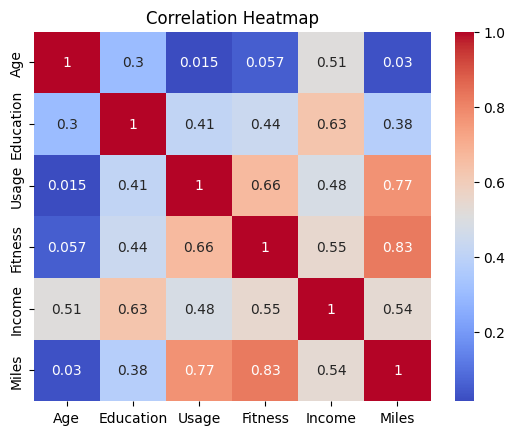

In [63]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

🔎***Insights:*** From the above heatmap it can be concluded that
* Age and Income are positively correlated and heatmap also suggests a strong correlation between them
* Eductaion and Income are highly correlated as its obvious.
* Eductation also has significatnt correlation between Fitness rating andUsage of the treadmill.
* Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

#Q6. Customer profiling and recommendation
**- Q6(a) Make customer profilings for each and every product. Hint: We want you to find at What age, gender, and income group bought the product KP281**


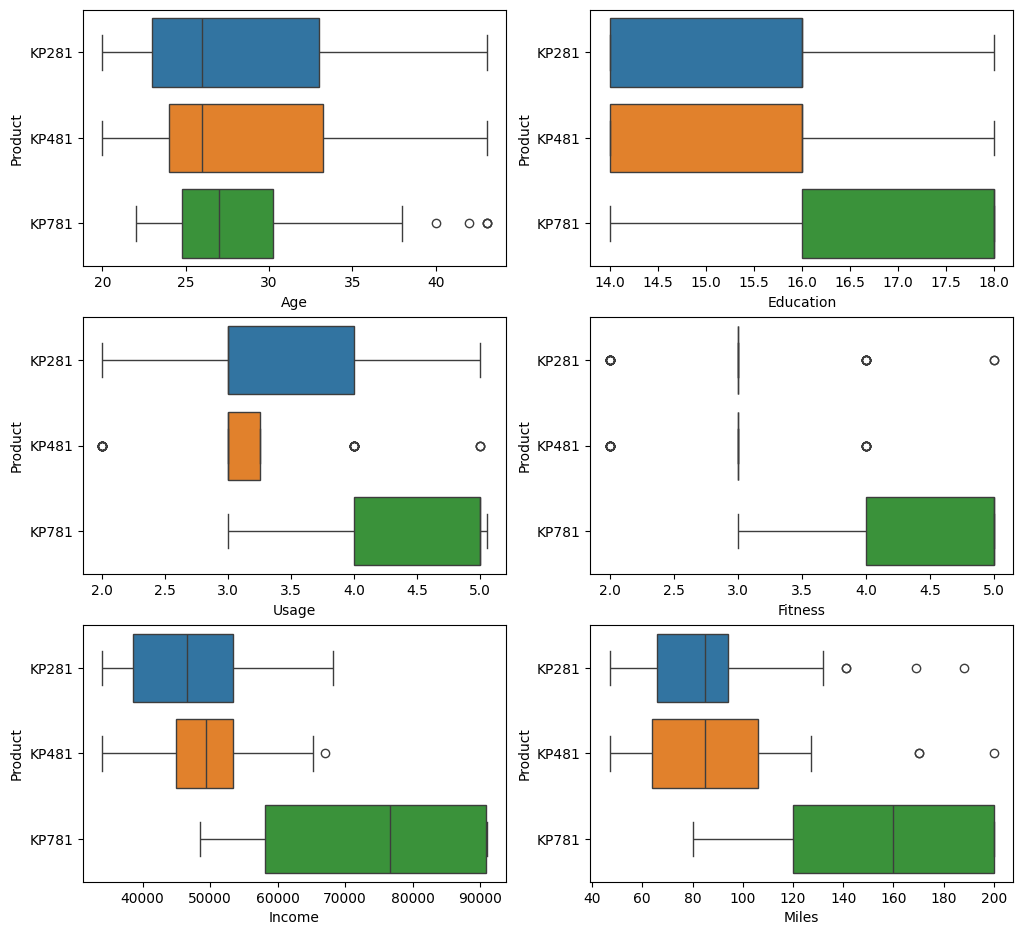

In [64]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2) #adjusts the spacing around subplots in a matplotlib figure.
sns.boxplot(data=df, x="Age", y='Product', hue='Product', ax=axis[0,0])
sns.boxplot(data=df, x="Education", y='Product', hue='Product', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", y='Product', hue='Product', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", y='Product', hue='Product', ax=axis[1,1])
sns.boxplot(data=df, x="Income", y='Product', hue='Product', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", y='Product', hue='Product', ax=axis[2,1])
plt.show()

**Customer Profile for KP281 Treadmill:**
- This treadmill is preferred by entry level
- Age of customer mainly between 20 to 35 years and only a few between 35 to 50 years
- Education of customers is 13 years to 14 years
- Annual Income of customer ranges from 35k USD 70k USD
- Weekly Usage - 3 to 4 times per week
- Fitness Scale - 2 to 4
- Weekly Running/Walking Miles - 50 to 135 miles
- Mostly Females(single and partnered) and Single Males prefer this product

**Customer Profile for KP481 Treadmill:**
- This is a mid level Product.
- Age of customers is between 18 to 35 years with most of them being between 23 to 33 years of age
- Education of customers is 13 years to 14 years
- Annual Income of customer between 40k-80k USD
- Weekly Usage - 2 to 4 times
- Fitness Scale - 2 to 4
- Weekly Running/Walking Miles  - 50 to 135 miles
- Probability of Female customer buying KP481 is significantly higher than male.

**Customer Profile for KP781 Treadmill:**
- This is a high end and expensive treadmill, thus having less no of customers
- Preferred by customers having high income, more education and a good to excellent fitness rating
- Age of majority of customers lies between 24 to 32 years
- Education level of customers 15 to 16 years
- Median Annual Income of customers is around 80k,
- Annual income is between 59k to 90k USD and above
- Weekly Usage - 4 to 7 times per week
- Fitness Scale - 3 to 5
- Weekly Running/Walking Miles  is between 120 to 200 miles
- Partnered Male is more likely to buy KP781 treadmill compared to Partnered Female.

**- Q6(b) Write a detailed recommendation from the analysis that you have done.**

**Gender-Targeted Marketing for KP781:**
- Recommendation: Implement targeted strategies to address the significant sales disparity in KP781 between genders.
- Actionable Insight: Launch exclusive promotions and trials designed specifically for female customers to increase their engagement andcontribution to sales.

**Strategic Product Promotion:**

- Recommendation: Use KP781 customers for targeted promotions.
- Actionable Insight: Analyze the characteristics of KP781 customers (males, high income, premium preference) and promote marketing messages to highlight features that align with these attributes

**Focus on KP481 with No-Cost EMI Support:**
- Recommendation: Provide KP481 with incentives such as no-cost EMI support.
- Actionable Insight: Position KP481 as an attractive option, especially for customers looking for flexible payment options, and communicate the benefits of the no-cost EMI plan.


**Encouraging Female Fitness:**
- Recommendation: Launch a campaign focusing only on women to embrace fitness with Aerofit treadmills.
- Actionable Insight: Advertise motivating and inclusive messages that highlight the benefits of Aerofit treadmills especially targeting female customers.


**Budget Treadmill Image for KP281 & KP481:**
- Recommendation: Position KP281 and KP481 as pocket friendly options.
- Actionable Insight: Use pricing and payment schemes to create a perception of affordability, appealing to customers with less budget.

In [65]:
#extra analysis

In [66]:
pd.crosstab(index=df['Product'], columns=[df['Gender'], df['MaritalStatus']],margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

In [67]:
np.round(pd.crosstab(index=df['Product'], columns=[df['Gender'], df['MaritalStatus']],margins=True, normalize=True),4)*100

Gender           Female             Male            All
MaritalStatus Partnered Single Partnered Single        
Product                                                
KP281             15.00   7.22     11.67  10.56   44.44
KP481              8.33   7.78     11.67   5.56   33.33
KP781              2.22   1.67     10.56   7.78   22.22
All               25.56  16.67     33.89  23.89  100.00

🔎***Insights:***
* There is a 15% chance that a female partnered customer will buy KP281
* A male partnered customer will be eqaully likely to buy KP281 and KP481
* A single male will buy a KP281 has a 10.56% probability.

In [68]:
#conditional probability
np.round(pd.crosstab(index=df['Product'], columns=[df['Gender'], df['MaritalStatus']],margins=True, normalize='columns'),4)*100

Gender           Female             Male           All
MaritalStatus Partnered Single Partnered Single       
Product                                               
KP281             58.70  43.33     34.43  44.19  44.44
KP481             32.61  46.67     34.43  23.26  33.33
KP781              8.70  10.00     31.15  32.56  22.22

🔎***Insights:***
* Given that a customer is female and partnered, there is a 58.7% chance that she will buy a KP281
* Given that a customer is male and partnered, there is a 34.43% chance that he will buy a KP281 or KP481
* Given that a customer is male and single, there is a 44.19% chance that she will buy a KP281 and 32.56% chance that he will buy a KP781
* Given a customer is female and single, there is 43.33% probability of buying KP281 and 46.67% chance of buying KP481

In [69]:
pd.crosstab(index=df['Product'], columns=[df['Income_Group'], df['Education']],margins=True)

Income_Group lower middle           middle class        upper middle     \
Education              14 15  16 18           14  16 18           15 18   
Product                                                                   
KP281                  26  4  18  0            9  21  0            0  2   
KP481                  22  0   7  1            4  24  0            1  1   
KP781                   1  0   3  1            0   6  5            0  5   
All                    49  4  28  2           13  51  5            1  8   

Income_Group high class         All  
Education            14 16  18       
Product                              
KP281                 0  0   0   80  
KP481                 0  0   0   60  
KP781                 1  6  12   40  
All                   1  6  12  180

In [70]:
np.round(pd.crosstab(index=df['Product'], columns=[df['Income_Group'], df['Education']],margins=True, normalize=True),4)*100

Income_Group lower middle                    middle class               \
Education              14    15     16    18           14     16    18   
Product                                                                  
KP281               14.44  2.22  10.00  0.00         5.00  11.67  0.00   
KP481               12.22  0.00   3.89  0.56         2.22  13.33  0.00   
KP781                0.56  0.00   1.67  0.56         0.00   3.33  2.78   
All                 27.22  2.22  15.56  1.11         7.22  28.33  2.78   

Income_Group upper middle       high class                 All  
Education              15    18         14    16    18          
Product                                                         
KP281                0.00  1.11       0.00  0.00  0.00   44.44  
KP481                0.56  0.56       0.00  0.00  0.00   33.33  
KP781                0.00  2.78       0.56  3.33  6.67   22.22  
All                  0.56  4.44       0.56  3.33  6.67  100.00

In [71]:
np.round(pd.crosstab(index=df['Product'], columns=[df['Income_Group'], df['Education']],margins=True, normalize='columns'),4)*100

Income_Group lower middle                     middle class                \
Education              14     15     16    18           14     16     18   
Product                                                                    
KP281               53.06  100.0  64.29   0.0        69.23  41.18    0.0   
KP481               44.90    0.0  25.00  50.0        30.77  47.06    0.0   
KP781                2.04    0.0  10.71  50.0         0.00  11.76  100.0   

Income_Group upper middle       high class                  All  
Education              15    18         14     16     18         
Product                                                          
KP281                 0.0  25.0        0.0    0.0    0.0  44.44  
KP481               100.0  12.5        0.0    0.0    0.0  33.33  
KP781                 0.0  62.5      100.0  100.0  100.0  22.22

🔎***Insights:***
* Given that a customer belongs to lower middle class and has 14-15 years of education, there is a 53.06% and 44.9% chance that he/she will buy a KP281 and KP481 respectively
* Given that a customer belongs to middle class, has 14 or 16 years of education, there is a 30.77% and 47.06% chance respectively that he/she will buy a KP481
* Given that a customer belongs to middle class, has 14 or 16 years of education, there is a 100% chance respectively that he/she will buy a KP781

# **End of Project**